In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
playstore = pd.read_csv("data/googleplaystore.csv")

In [4]:
playstore.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [5]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
playstore.drop_duplicates(subset='App', keep="first", inplace=True)

In [7]:
playstore.drop([10472], inplace=True)

In [8]:
playstore['Category'] = playstore['Category'].astype('category')

In [9]:
playstore.Installs.apply(lambda x: x.replace(",",""))

0           10000+
1          500000+
2         5000000+
3        50000000+
4          100000+
           ...    
10836        5000+
10837         100+
10838        1000+
10839        1000+
10840    10000000+
Name: Installs, Length: 9659, dtype: object

In [10]:
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(",",""))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace("+",""))
playstore['Installs'] = playstore['Installs'].astype('int')

In [11]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs             int32
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [12]:
playstore.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type Price Content Rating  \
0     159   19M     10000  Free     0       Everyone   
1     967   14M    500000  Free     0       Everyone   
2   87510  8.7M   5000000  Free     0       Everyone   
3  215644   25M  50000000  Free     0           Teen   
4     967  2.8M    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [13]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [14]:
playstore.Price.value_counts()

0         8903
$0.99      145
$2.99      124
$1.99       73
$4.99       70
          ... 
$89.99       1
$15.99       1
$3.90        1
$1.96        1
$3.08        1
Name: Price, Length: 92, dtype: int64

In [15]:
playstore.Price = playstore.Price.apply(lambda x: x.replace("$",""))
playstore.Price = playstore.Price.astype('float')

In [16]:
playstore.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews        Size  Installs  Type  Price Content Rating  \
0     159  19000000.0     10000  Free    0.0       Everyone   
1     967  14000000.0    500000  Free    0.0       Everyone   
2   87510   8700000.0   5000000  Free    0.0       Everyone   
3  215644  25000000.0  50000000  Free    0.0           Teen   
4     967   2800000.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [17]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [18]:
playstore[['Reviews','Size','Installs']] = playstore[['Reviews','Size','Installs']].astype('int')

In [19]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews              int32
Size                 int32
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [20]:
df2 = playstore.copy()

In [21]:
top_category = pd.crosstab(index=playstore['Category'], columns='Jumlah').reset_index().sort_values(by='Jumlah', ascending=False)
top_category

col_0             Category  Jumlah
11                  FAMILY    1832
14                    GAME     959
29                   TOOLS     827
4                 BUSINESS     420
20                 MEDICAL     395
23         PERSONALIZATION     376
25            PRODUCTIVITY     374
18               LIFESTYLE     369
12                 FINANCE     345
28                  SPORTS     325
6            COMMUNICATION     315
15      HEALTH_AND_FITNESS     288
24             PHOTOGRAPHY     281
21      NEWS_AND_MAGAZINES     254
27                  SOCIAL     239
3      BOOKS_AND_REFERENCE     222
30        TRAVEL_AND_LOCAL     219
26                SHOPPING     202
7                   DATING     171
31           VIDEO_PLAYERS     163
19     MAPS_AND_NAVIGATION     131
8                EDUCATION     119
13          FOOD_AND_DRINK     112
9            ENTERTAINMENT     102
1        AUTO_AND_VEHICLES      85
17      LIBRARIES_AND_DEMO      84
32                 WEATHER      79
16          HOUSE_AND_HOME      74
10                  EVENTS      64
0           ART_AND_DESIGN      64
22               PARENTING      60
5                   COMICS      56
2                   BEAUTY      53

In [22]:
top_category.Category[11]

'FAMILY'

In [26]:
top_category.Jumlah[11]

1832

In [28]:
playstore.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews      Size  Installs  Type  Price Content Rating  \
0      159  19000000     10000  Free    0.0       Everyone   
1      967  14000000    500000  Free    0.0       Everyone   
2    87510   8700000   5000000  Free    0.0       Everyone   
3   215644  25000000  50000000  Free    0.0           Teen   
4      967   2800000    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [63]:
playstore.groupby(['Category','App']).agg({'Reviews':'sum', 'Rating':'mean'}).sort_values(by='Reviews', ascending=False).head(10).reset_index()

Category                                                App  \
0         SOCIAL                                           Facebook   
1  COMMUNICATION                                 WhatsApp Messenger   
2         SOCIAL                                          Instagram   
3  COMMUNICATION           Messenger – Text and Video Chat for Free   
4           GAME                                     Clash of Clans   
5          TOOLS            Clean Master- Space Cleaner & Antivirus   
6           GAME                                     Subway Surfers   
7  VIDEO_PLAYERS                                            YouTube   
8          TOOLS  Security Master - Antivirus, VPN, AppLock, Boo...   
9           GAME                                       Clash Royale   

      Reviews  Rating  
0  78158306.0     4.1  
1  69119316.0     4.4  
2  66577313.0     4.5  
3  56642847.0     4.0  
4  44891723.0     4.6  
5  42916526.0     4.7  
6  27722264.0     4.5  
7  25655305.0     4.3  
8  24900999.0     4.7  
9  23133508.0     4.6

In [35]:
df2.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews      Size  Installs  Type  Price Content Rating  \
0      159  19000000     10000  Free    0.0       Everyone   
1      967  14000000    500000  Free    0.0       Everyone   
2    87510   8700000   5000000  Free    0.0       Everyone   
3   215644  25000000  50000000  Free    0.0           Teen   
4      967   2800000    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [113]:
 ## Bar Plot
    ## Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category
    ## Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak
cat_order = df2.groupby('Category').agg({'App' : 'count'}).rename({'Category':'Total'}, axis=1).sort_values(by='App', ascending=False).reset_index().head()
cat_order

Category   App
0    FAMILY  1832
1      GAME   959
2     TOOLS   827
3  BUSINESS   420
4   MEDICAL   395

In [122]:
cat_order['Category'].values

[FAMILY, GAME, TOOLS, BUSINESS, MEDICAL]
Categories (33, object): [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, ..., TOOLS, TRAVEL_AND_LOCAL, VIDEO_PLAYERS, WEATHER]

In [114]:
cat_order['Category'].values.tolist()

['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL']

In [115]:
X = cat_order['Category'].values.tolist()
Y = cat_order['App'].values.tolist()
my_colors = 'rgbkymc'

In [116]:
X

['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL']

In [117]:
Y

[1832, 959, 827, 420, 395]

<BarContainer object of 5 artists>

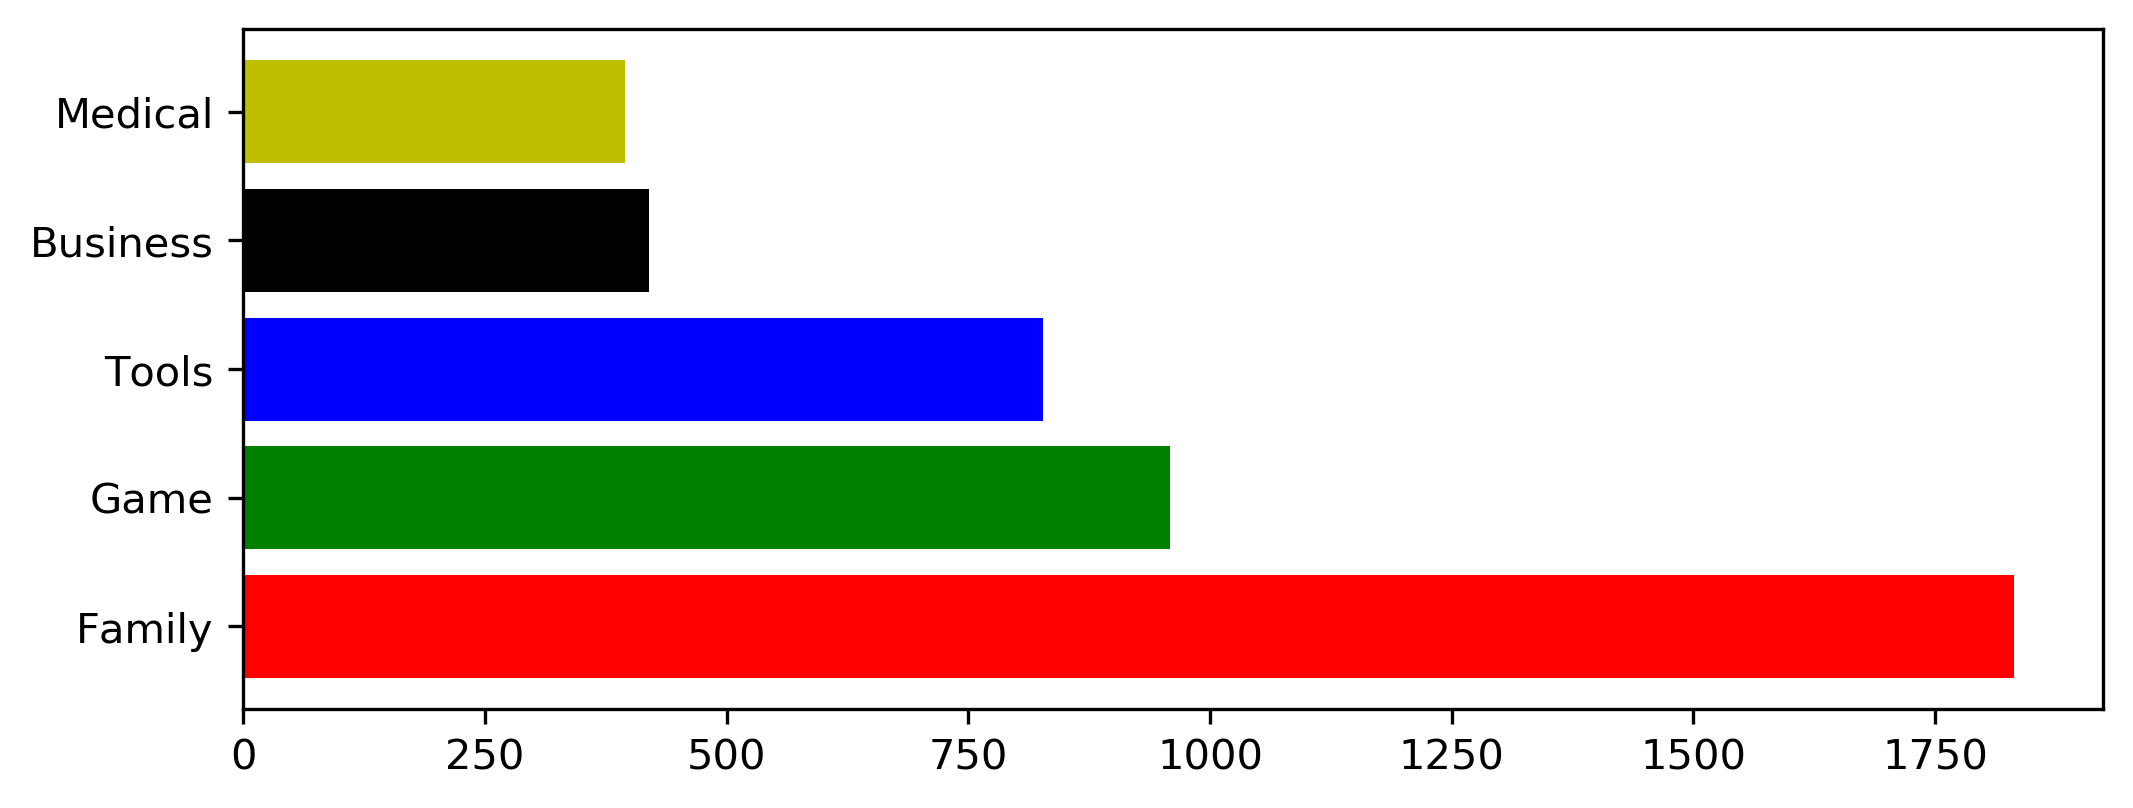

In [120]:
my_colors = 'rgbkymc'
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh(X, Y, color=my_colors)

In [121]:
df2.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews      Size  Installs  Type  Price Content Rating  \
0      159  19000000     10000  Free    0.0       Everyone   
1      967  14000000    500000  Free    0.0       Everyone   
2    87510   8700000   5000000  Free    0.0       Everyone   
3   215644  25000000  50000000  Free    0.0           Teen   
4      967   2800000    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

Text(0, 0.5, 'Rating')

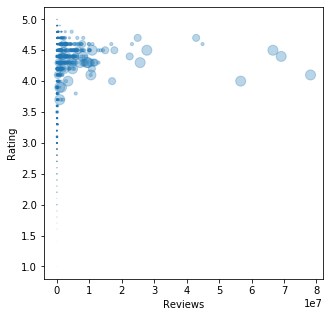

In [125]:
## Scatter Plot
    # Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
    # Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
X = df2['Reviews'].values
Y = df2['Rating'].values
area_size = playstore['Installs'].values/10000000
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.scatter(x=X,y=Y, s=area_size, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
